<div id="floating-toc">
    <h2>Table of Contents</h2>
    <ul id="toc-list"></ul>
</div>

<script>
document.addEventListener('DOMContentLoaded', function() {
    const tocList = document.getElementById('toc-list');
    const headers = document.querySelectorAll('h1, h2, h3, h4, h5, h6');

    headers.forEach(header => {
        const anchorId = header.id || `header-${Math.random().toString(36).substr(2, 9)}`;
        header.id = anchorId;

        const listItem = document.createElement('li');
        const link = document.createElement('a');
        link.href = `#${anchorId}`;
        link.textContent = header.textContent;
        listItem.appendChild(link);
        tocList.appendChild(listItem);
    });
});
</script>

<style>
#floating-toc {
    position: fixed;
    top: 20%;
    right: 10px;
    width: 200px;
    background-color: #f8f9fa;
    padding: 10px;
    border: 1px solid #ccc;
    border-radius: 5px;
    box-shadow: 0 2px 5px rgba(0,0,0,0.1);
}

#floating-toc h2 {
    font-size: 18px;
    margin-bottom: 10px;
    color: #333;
}

#toc-list {
    list-style-type: none;
    padding: 0;
}

#toc-list li {
    margin-bottom: 5px;
}

#toc-list a {
    text-decoration: none;
    color: #007bff;
    transition: color 0.3s ease;
}

#toc-list a:hover {
    color: #0056b3;
}
</style>


<a id="titulo-principal"></a>
# 1. Giới thiệu
<a id="subseccion-a"></a>
### Mục đích chính:
Để hiểu mô hình bán hàng, phân tích về hành vi của khách hàng và xu hướng bán hàng theo mùa từ một tập dữ liệu cụ thể.
<a id="subseccion-a"></a>
### Content:
Bộ dữ liệu được lấy trên Kaggle về dữ liệu của tất cả giao dịch từ ngày 01/12/2010 đến ngày 09/12/2011 của một công ty bán lẻ trực tuyến đăng ký tại Vương quốc Anh. Công ty chủ yếu bán những sản phẩm độc đáo cho các dịp đặc biệt. Nhiều khách hàng của công ty là các nhà bán buôn.

<a id="titulo-principal"></a>
# 2. Nhập thư viện và tải bộ dữ liệu

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly.express as px
from datetime import datetime, timedelta

In [2]:
df = pd.read_csv('data.csv', encoding='ISO-8859-1')
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


<a id="titulo-principal"></a>
# 3. Khai phá dữ liệu
<a id="subseccion-a"></a>
### Ta có thể thấy được:
Cột 'InvoiceDate' cần được đổi kiểu dữ liệu sang kiểu datetime để hỗ trợ cho việc phân tích dữ liệu cho ngày, tháng, năm phía sau.
Cần tìm ra các giá trị rỗng, giá trị thiếu, 0,... để làm sạch dữ liệu.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


<a id="subseccion-a"></a>
### Hiển thị các dữ liệu còn thiếu

In [4]:
# Tìm các cột chứa giá trị 0
df.columns[df.isin([0]).any()]

Index(['UnitPrice'], dtype='object')

In [5]:
#Hiển thị số lượng giá trị còn thiếu (NaN) trong mỗi cột
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

<a id="titulo-principal"></a>
# 4. Làm sạch dữ liệu
<a id="subseccion-a"></a>
### 4.1 Thay thế giá trị 0 bằng giá trị trung bình

In [6]:
# Tính giá trị trung bình của cột 'UnitPrice'
unit_price_mean = df['UnitPrice'].mean()

In [7]:
# Thay thế giá trị 0 bằng giá trị trung bình
df['UnitPrice'] = df['UnitPrice'].replace(0, unit_price_mean)

<a id="subseccion-a"></a>
### 4.2 Điền giá trị còn thiếu vào cột 'Description'

In [8]:
df['Description'].fillna('No description available')

0          WHITE HANGING HEART T-LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4              RED WOOLLY HOTTIE WHITE HEART.
                         ...                 
541904            PACK OF 20 SPACEBOY NAPKINS
541905           CHILDREN'S APRON DOLLY GIRL 
541906          CHILDRENS CUTLERY DOLLY GIRL 
541907        CHILDRENS CUTLERY CIRCUS PARADE
541908          BAKING SET 9 PIECE RETROSPOT 
Name: Description, Length: 541909, dtype: object

<a id="subseccion-a"></a>
### 4.3 Chuyển kiểu dữ liệu cột 'InvoiceDate' sang kiểu datetime

In [9]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Hiển thị lại các kiểu dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


<a id="titulo-principal"></a>
# 5. Phân tích doanh thu và sản phẩm bán ra
<a id="subseccion-a"></a>
### Phân tích về các sản phẩm bán ra
Sản phẩm có số lượng bán chạy nhất là "WORLD WAR 2 GLIDERS ASSTD DESIGNS". Ngoài ra "JUMBO BAG RED RETROSPOT" và "ASSORTED COLOUR BIRD ORNAMENT" cũng có số lượng bán ra khá đáng kể. Đây là những sản phẩm có mức mua cao vì vậy cần được lưu trữ thường xuyên trong kho hàng để đáp ứng được nhu cầu mua hàng.

In [10]:
# Tổng hợp số lượng bán ra theo từng sản phẩm
sales_by_product = df.groupby('Description')['Quantity'].sum().reset_index()

# Sắp xếp số lượng bán ra theo thứ tự giảm dần và lấy top 10 sản phẩm có số lượng bán ra nhiều nhất
top_10_products = sales_by_product.sort_values(by='Quantity', ascending=False).head(10)

# Tìm sản phẩm có số lượng bán ra nhiều nhất
max_sales_product = sales_by_product.loc[sales_by_product['Quantity'].idxmax()]
max_sales_value = max_sales_product['Quantity']

print(f'Sản phẩm có số lượng bán ra nhiều nhất: {max_sales_product["Description"]}')
print(f'Số lượng sản phẩm {max_sales_product["Description"]} bán ra là: {max_sales_value}')
print(f"Top 10 sản phẩm có số lượng bán ra cao nhất:\n{top_10_products}")

Sản phẩm có số lượng bán ra nhiều nhất: WORLD WAR 2 GLIDERS ASSTD DESIGNS
Số lượng sản phẩm WORLD WAR 2 GLIDERS ASSTD DESIGNS bán ra là: 53847
Top 10 sản phẩm có số lượng bán ra cao nhất:
                             Description  Quantity
4009   WORLD WAR 2 GLIDERS ASSTD DESIGNS     53847
1866             JUMBO BAG RED RETROSPOT     47363
244        ASSORTED COLOUR BIRD ORNAMENT     36381
2740                      POPCORN HOLDER     36334
2395     PACK OF 72 RETROSPOT CAKE CASES     36039
3918  WHITE HANGING HEART T-LIGHT HOLDER     35317
2803                  RABBIT NIGHT LIGHT     30680
2161             MINI PAINT SET VINTAGE      26437
2361          PACK OF 12 LONDON TISSUES      26315
2393  PACK OF 60 PINK PAISLEY CAKE CASES     24753


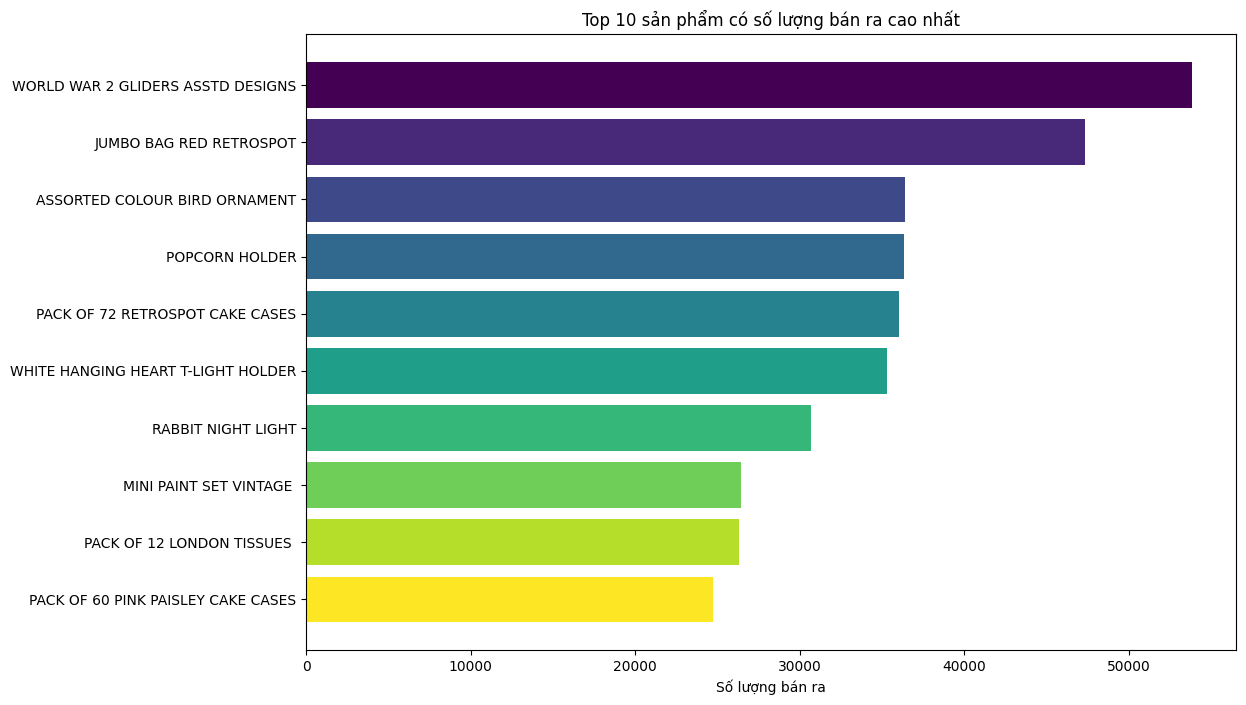

In [11]:
#Vẽ biểu đồ
plt.figure(figsize=(12, 8))
colors = plt.cm.viridis(np.linspace(0, 1, len(top_10_products)))
plt.barh(top_10_products['Description'], top_10_products['Quantity'], color=colors)
plt.xlabel('Số lượng bán ra')
plt.title('Top 10 sản phẩm có số lượng bán ra cao nhất')
plt.gca().invert_yaxis()  
plt.show()

<a id="subseccion-a"></a>
### Phân tích doanh thu của từng sản phẩm
2 sản phẩm đem lại doanh thu cao nhất là "DOTCOM POSTAGE" và "REGENCY CAKESTAND 3 TIER". Những mặt hàng này không chỉ có doanh số bán hàng cao mà còn đóng góp đáng kể vào tổng doanh thu của cửa hàng.

In [12]:
#Tính tổng tiền cuối cùng 
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Tổng hợp doanh thu của từng sản phẩm
sales_total_by_product = df.groupby('Description')['TotalPrice'].sum().reset_index()

# Sắp xếp doanh thu của từng sản phẩm bán ra và sắp theo thứ tự giảm dần rồi lấy top 10 sản phẩm có doanh thu cao nhất
top_10_total_products = sales_total_by_product.sort_values(by='TotalPrice', ascending=False).head(10)

# Tìm sản phẩm có doanh thu bán ra nhiều nhất
max_total_sales_product = sales_total_by_product.loc[sales_total_by_product['TotalPrice'].idxmax()]
max_total_sales_value = max_total_sales_product['TotalPrice']

print(f'Sản phẩm có doanh thu bán ra nhiều nhất: {max_sales_product["Description"]}')
print(f'Doanh thu của sản phẩm {max_sales_product["Description"]} bán ra là: {max_sales_value}')
print(f"Top 10 sản phẩm có doanh thu bán ra cao nhất:\n{top_10_total_products}")

Sản phẩm có doanh thu bán ra nhiều nhất: WORLD WAR 2 GLIDERS ASSTD DESIGNS
Doanh thu của sản phẩm WORLD WAR 2 GLIDERS ASSTD DESIGNS bán ra là: 53847
Top 10 sản phẩm có doanh thu bán ra cao nhất:
                             Description     TotalPrice
1098                      DOTCOM POSTAGE  206254.702227
2915            REGENCY CAKESTAND 3 TIER  164812.912250
3918  WHITE HANGING HEART T-LIGHT HOLDER   99686.914455
2471                       PARTY BUNTING   98321.424455
1866             JUMBO BAG RED RETROSPOT   92374.474455
2803                  RABBIT NIGHT LIGHT   66756.590000
2753                             POSTAGE   66230.640000
2439     PAPER CHAIN KIT 50'S CHRISTMAS    63791.940000
244        ASSORTED COLOUR BIRD ORNAMENT   58959.730000
275       ASSTD DESIGN 3D PAPER STICKERS   58164.294871


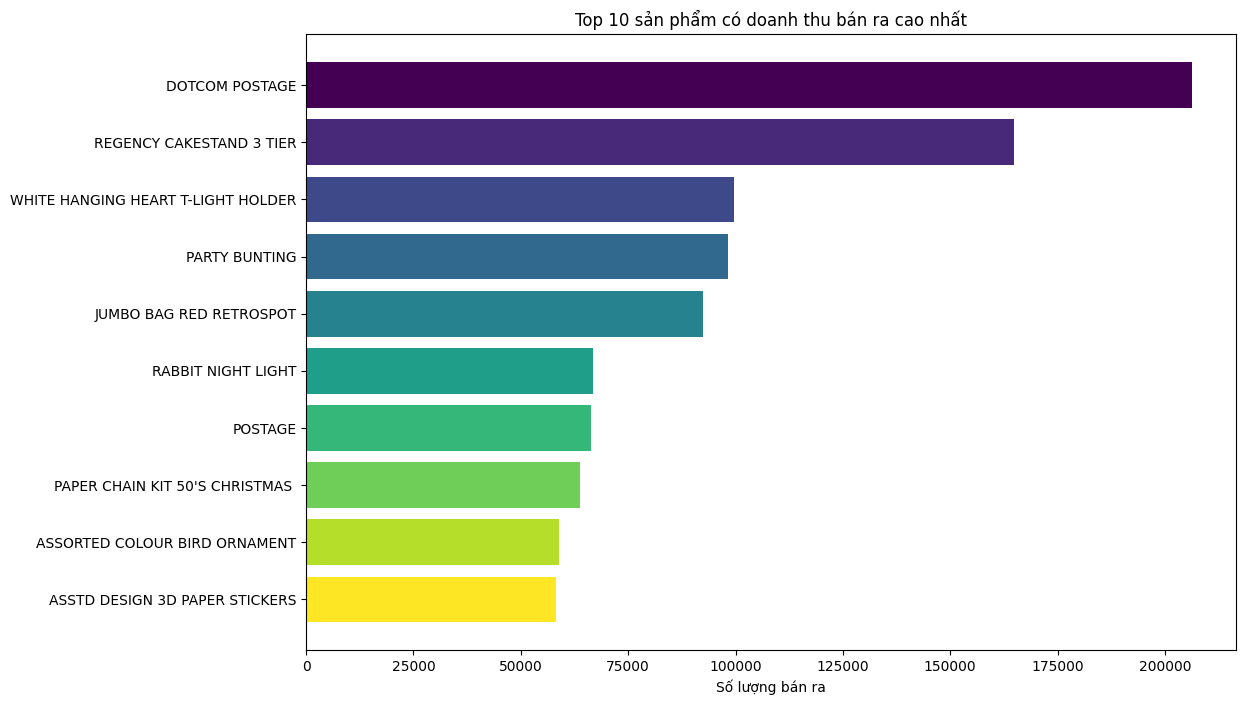

In [13]:
#Vẽ biểu đồ
plt.figure(figsize=(12, 8))
colors = plt.cm.viridis(np.linspace(0, 1, len(top_10_total_products)))
plt.barh(top_10_total_products['Description'], top_10_total_products['TotalPrice'], color=colors)
plt.xlabel('Số lượng bán ra')
plt.title('Top 10 sản phẩm có doanh thu bán ra cao nhất')
plt.gca().invert_yaxis()
plt.show()

In [14]:
#Đưa cột TotalPrice sang bên cạch cột Unit Price để dễ nhìn
moving_column = df.pop('TotalPrice')
df.insert(6, 'TotalPrice', moving_column)
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,TotalPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,15.30,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,20.34,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,22.00,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,20.34,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,20.34,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,15.30,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,25.50,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,11.10,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,11.10,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,54.08,13047.0,United Kingdom


<a id="titulo-principal"></a>
# 6. Phân tích khách hàng
<a id="subseccion-a"></a>
### Hồ sơ khách hàng (Phân tích RFM)
Dựa trên phân tích RFM, các phân khúc khách hàng khác nhau được xác định:

- Khách hàng gần đây: lần gần nhất khách hàng mua hàng là 2 ngày trước, cho thấy được hoạt động mua hàng gần đây cao.
- Tần suất mua hàng: Trung bình tần suất mua hàng của khách hàng là 5 lần, 1 số khách hàng có tần suất mua hàng từ 100 đến hơn 200 lần. Điều này cho thấy lòng trung thành của khách hàng cao và hoạt động mua hàng được đánh giá là thường xuyên.
- Giá trị tiền tệ: Giá trị tiền tệ thay đổi đáng kể, mức mua của khách hàng là đa dạng. Tuy nhiên những khách hàng có tần suất mua cao không hẳn có mức chi tiêu cao nhất.

In [15]:
# Chọn ngày tham chiếu để tính toán thời gian mua gần đây
# Sử dụng ngày cuối cùng trong dữ liệu cộng thêm 1 ngày đảm bảo rằng chỉ số Recency là số ngày kể từ lần mua hàng gần nhất.
reference_date = df['InvoiceDate'].max() + timedelta(days=1)

# Tính RFM
rfm = df.groupby('CustomerID').agg({
#Recency: Số ngày từ lần mua hàng gần nhất của khách hàng đến ngày tham chiếu.
    'InvoiceDate': lambda x: (reference_date - x.max()).days,
#Frequency: Số lượng hóa đơn duy nhất của mỗi khách hàng, đại diện cho tần suất mua hàng.
    'InvoiceNo': 'nunique',
#Monetary: Tổng tiền của các hóa đơn, đại diện cho tổng tiền chi tiêu của khách hàng.
    'TotalPrice': 'sum'
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
rfm.head(10)

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,2,0.00
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40
5,12352.0,36,11,1545.41
6,12353.0,204,1,89.00
7,12354.0,232,1,1079.40
8,12355.0,214,1,459.40
9,12356.0,23,3,2811.43


In [16]:
# Tìm 20 khách hàng có tần suất mua hàng nhiều nhất
top_10_frequency_customers = rfm.sort_values(by='Frequency', ascending=False).head(20)
print(f'20 khách hàng có tần suất mua hàng nhiều nhất:\n {top_10_frequency_customers}')

20 khách hàng có tần suất mua hàng nhiều nhất:
       CustomerID  Recency  Frequency       Monetary
1895     14911.0        1        248  133725.398407
330      12748.0        1        224   29076.711114
4042     17841.0        2        169   40340.780000
1674     14606.0        1        128   11713.850000
568      13089.0        3        118   57385.880000
2192     15311.0        1        118   59419.340000
487      12971.0        4         89   10930.260000
1615     14527.0        3         86    7711.380000
803      13408.0        2         81   27487.410000
1703     14646.0        2         77  282145.021449
2722     16029.0       39         76   50992.610000
3014     16422.0       17         75   33805.690000
1345     14156.0       10         66  113384.140000
1078     13798.0        1         63   36351.420000
4233     18102.0        1         62  256438.490000
1005     13694.0        4         60   62653.100000
3758     17450.0        8         55  187482.170000
1999     15061.0

In [17]:
# Tìm khách hàng chi tiêu nhiều nhất
top_monetary_customer = rfm.sort_values(by='Monetary', ascending=False).head(10)
print("10 Khách hàng chi tiêu nhiều nhất:")
print(top_monetary_customer)

10 Khách hàng chi tiêu nhiều nhất:
      CustomerID  Recency  Frequency       Monetary
1703     14646.0        2         77  282145.021449
4233     18102.0        1         62  256438.490000
3758     17450.0        8         55  187482.170000
1895     14911.0        1        248  133725.398407
55       12415.0       24         26  125090.339633
1345     14156.0       10         66  113384.140000
3801     17511.0        3         46   88125.380000
3202     16684.0        4         31   65892.080000
1005     13694.0        4         60   62653.100000
2192     15311.0        1        118   59419.340000


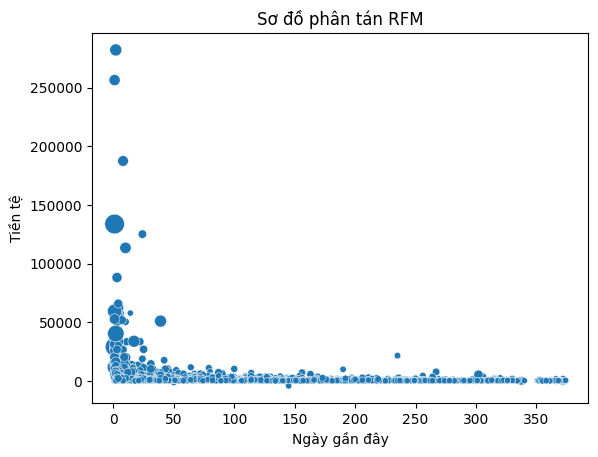

In [31]:
# Trực quan hóa RFM
sns.scatterplot(x='Recency', y='Monetary', size='Frequency', data=rfm, legend=False, sizes=(20, 200))
plt.xlabel('Ngày gần đây')
plt.ylabel('Tiền tệ')
plt.title('Sơ đồ phân tán RFM')
plt.show()

### Từ biểu đồ trên ta thấy được:
* Phần lớn các khách hàng có giá trị Recency nhỏ (tức là họ đã mua hàng gần đây). Điều này cho thấy số lượng khách hàng mua hàng vào những ngày cuối năm cao.
* Kích thước bong bóng lớn cho thấy những khách hàng có tần suất mua hàng cao vào giai đoạn cuối năm và chi tiêu khá đáng kể.
* Những khách hàng có giá trị Recency cao và Monetary thấp thường là những khách hàng không hoạt động trong một thời gian dài và chi tiêu ít.

Cửa hàng cần tập trung vào nhóm khách hàng có tần suất mua cao và mức chi tiêu từ trung bình đến cao để đưa ra các chiến lược phù hợp giữ chân nhóm khách hàng này. Đối với nhóm khách hàng có tần suất mua thấp và mức chi tiêu thấp nên có những chiến lược riêng để thu hút các đối tượng quay lại và tăng chỉ số tần suất mua hàng của nhóm khách hàng này.

In [19]:
customer_purchase_pattern = df.groupby('CustomerID')['InvoiceNo'].nunique().describe()
customer_purchase_pattern

count    4372.000000
mean        5.075480
std         9.338754
min         1.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       248.000000
Name: InvoiceNo, dtype: float64

Hầu hết khách hàng thực hiện từ 1 đến 3 lần mua hàng, trung bình mỗi khách hàng thực hiện 5 lần mua hàng. 

<a id="titulo-principal"></a>
# 7. Phân tích doanh số theo quốc gia

Doanh số tại Vương quốc Anh dẫn đầu, tiếp theo là Hà Lan và EIRE. Những dữ liệu này cho thấy tầm quan trọng của thị trường nội địa và các tiềm năng khi mở rộng cửa hàng tại các khu vực khác.

In [20]:
# Tổng hợp số lượng sản phẩm bán ra theo từng quốc gia
sales_by_country = df.groupby('Country')['Quantity'].sum().reset_index()

# Sắp xếp số lượng bán ra theo thứ tự giảm dần và lấy top 10 quốc gia có số lượng bán ra nhiều nhất
top_10_sales_by_country = sales_by_country.sort_values(by='Quantity', ascending=False).head(10)

# Tìm quốc gia có số lượng bán ra nhiều nhất
max_sales_by_country = sales_by_country.loc[sales_by_country['Quantity'].idxmax()]
max_sales_country = max_sales_by_country['Country']
max_sales_country_value = max_sales_by_country['Quantity']

print(f'Nước có số lượng sản phẩm bán ra nhiều nhất: {max_sales_country}')
print(f'Số lượng sản phẩm của {max_sales_country} bán ra là: {max_sales_country_value}')
print(f"Top 10 nước có số lượng sản phẩm bán ra:\n{top_10_sales_by_country}")

Nước có số lượng sản phẩm bán ra nhiều nhất: United Kingdom
Số lượng sản phẩm của United Kingdom bán ra là: 4263829
Top 10 nước có số lượng sản phẩm bán ra:
           Country  Quantity
36  United Kingdom   4263829
24     Netherlands    200128
10            EIRE    142637
14         Germany    117448
13          France    110480
0        Australia     83653
32          Sweden     35637
33     Switzerland     30325
31           Spain     26824
20           Japan     25218


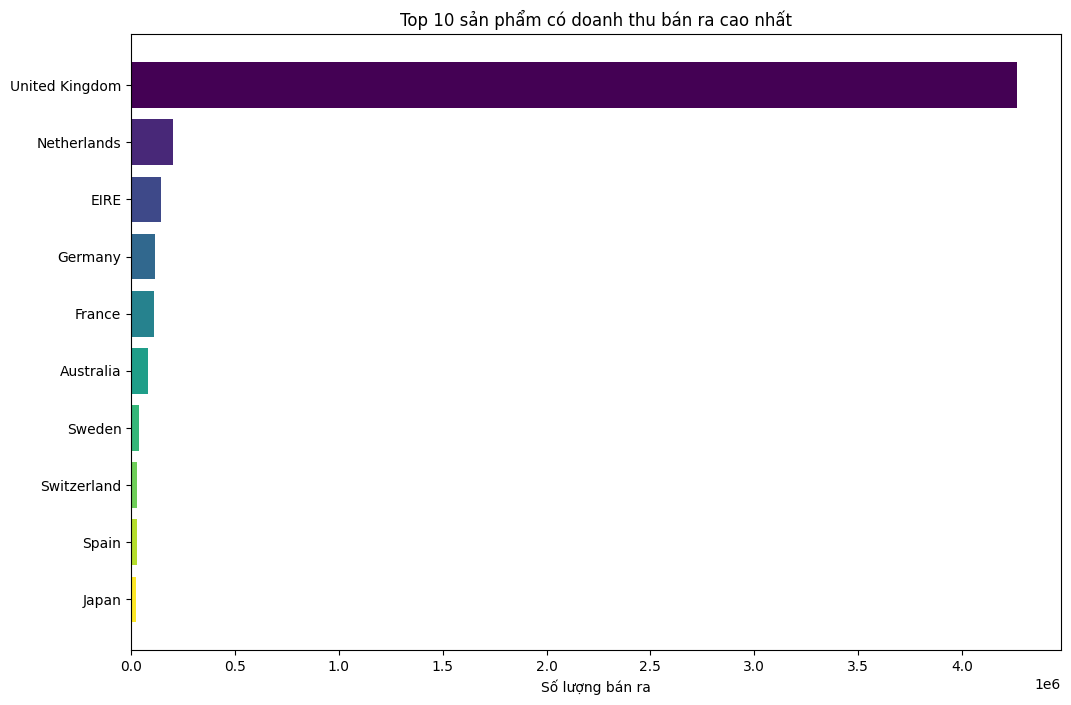

In [21]:
#Vẽ biểu đồ
plt.figure(figsize=(12, 8))
colors = plt.cm.viridis(np.linspace(0, 1, len(top_10_sales_by_country)))
plt.barh(top_10_sales_by_country['Country'], top_10_sales_by_country['Quantity'], color=colors)
plt.xlabel('Số lượng bán ra')
plt.title('Top 10 sản phẩm có doanh thu bán ra cao nhất')
plt.gca().invert_yaxis()  

<a id="titulo-principal"></a>
# 8. Xu hướng và tính thời vụ
<a id="subseccion-a"></a>
### Phân tích doanh số bán hàng theo thời gian (Theo tháng)
Doanh số bán hàng hàng tháng cho thấy xu hướng theo mùa có mức độ giao dịch cao nhất là khoảng từ tháng 9 đến tháng 11. Những đỉnh điểm này có thể là do các sự kiện như ngày lễ hoặc các chiến dịch quảng cáo thành công.

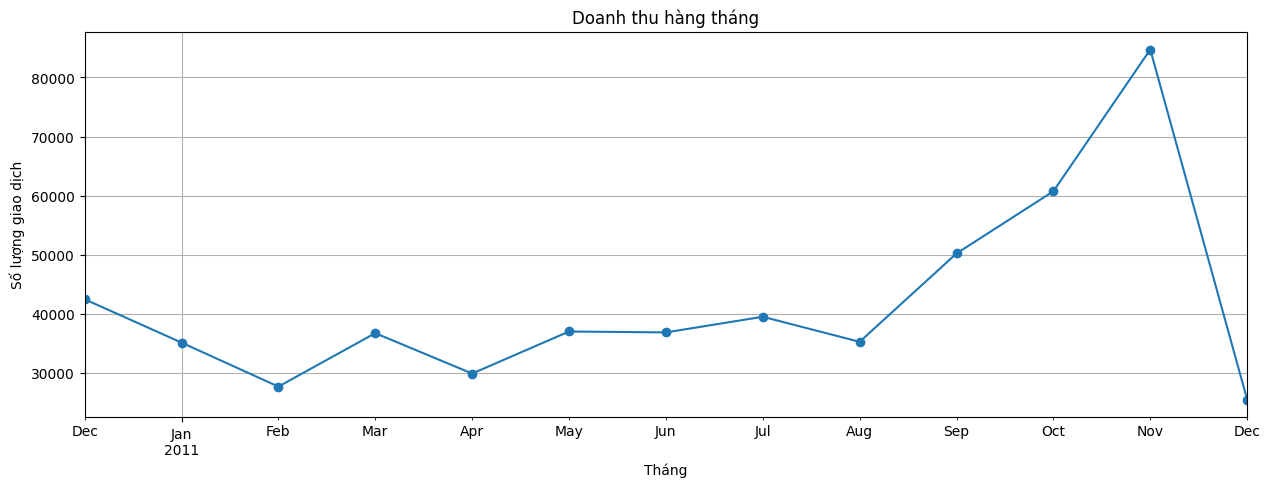

In [22]:
#Tạo cột tháng năm từ cột 'InvoiceDate'
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')
monthly_sales = df.groupby('YearMonth').size()
#Vẽ biểu đồ 
plt.figure(figsize=(15, 5))
monthly_sales.plot(marker='o')
plt.xlabel('Tháng')
plt.ylabel('Số lượng giao dịch')
plt.title('Doanh thu hàng tháng')
plt.grid()
plt.show()

In [23]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,TotalPrice,CustomerID,Country,YearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,15.30,17850.0,United Kingdom,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,20.34,17850.0,United Kingdom,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,22.00,17850.0,United Kingdom,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,20.34,17850.0,United Kingdom,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,20.34,17850.0,United Kingdom,2010-12
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,10.20,12680.0,France,2011-12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12.60,12680.0,France,2011-12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,16.60,12680.0,France,2011-12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,16.60,12680.0,France,2011-12


<a id="subseccion-a"></a>
### Doanh thu theo thứ trong tuần
Doanh số bán hàng được phân bổ tương đối đồng đều trong suốt cả tuần, giảm nhẹ vào những ngày cuối tuần. Điều này gợi ý rằng các chiến lược tiếp thị và khuyến mãi nên xem xét điều chỉnh để thúc đẩy doanh số bán hàng trong những ngày này.

In [24]:
# Thêm cột 'DayOfWeek' để lưu tên ngày trong tuần
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()

# Tổng hợp số lượng sản phẩm bán ra theo từng ngày trong tuần và sắp xếp đúng thứ tự các ngày
weekday_sales = df.groupby('DayOfWeek')['Quantity'].sum().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

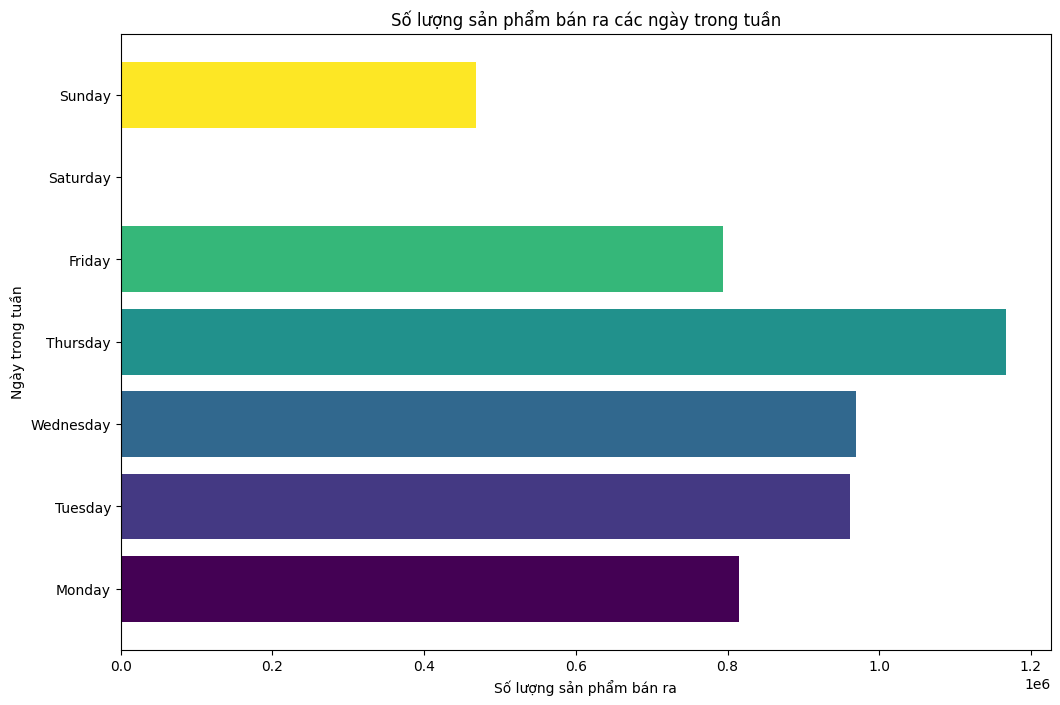

In [25]:
# Vẽ biểu đồ ngang
plt.figure(figsize=(12, 8))
colors = plt.cm.viridis(np.linspace(0, 1, len(weekday_sales)))
plt.barh(weekday_sales.index, weekday_sales.values, color=colors)
plt.xlabel('Số lượng sản phẩm bán ra')
plt.ylabel('Ngày trong tuần')
plt.title('Số lượng sản phẩm bán ra các ngày trong tuần')
plt.show()

<a id="subseccion-a"></a>
### Doanh thu theo giờ trong ngày
Giờ bán hàng cao điểm là từ 10 giờ sáng đến 3 giờ chiều, cao điểm là lúc 12 giờ trưa. Điều này cho biết thời điểm tối ưu nhất để thực hiện các chiến lược quảng cáo và quản lý hiệu quả các nguồn lực trong thời gian nhu cầu cao. Ngoài ra, có thể đưa ra các chương trình sale chớp nhoáng vào các khung giờ có lượng mua ít để tăng tỉ lệ mua hàng.

In [26]:
#Tạo cột 'Hour' để đánh giá thời gian giao dịch
df['Hour'] = df['InvoiceDate'].dt.hour
sales_by_hour = df.groupby('Hour')['Quantity'].sum()

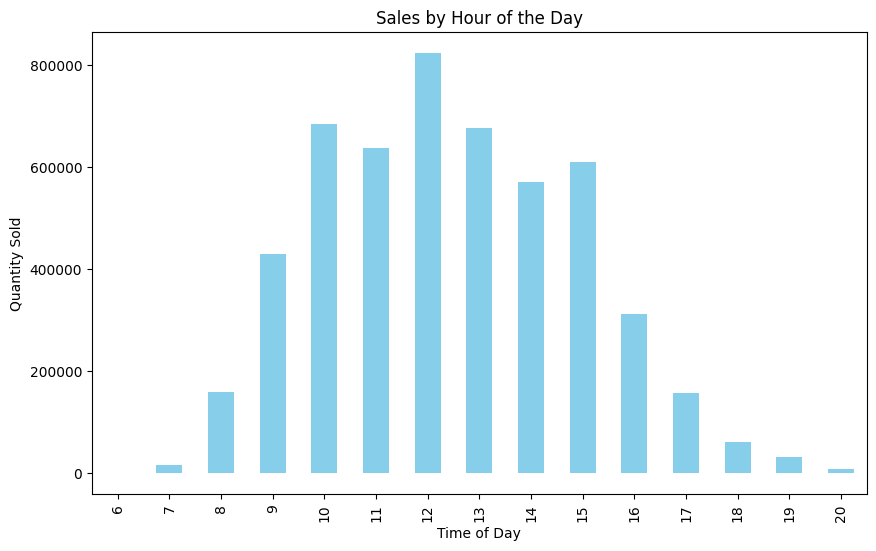

In [27]:
#Vẽ biểu đồ
plt.figure(figsize=(10, 6))
sales_by_hour.plot(kind='bar', color = 'skyblue')
plt.xlabel('Time of Day')
plt.ylabel('Quantity Sold')
plt.title('Sales by Hour of the Day')
plt.show()

<a id="titulo-principal"></a>
# 8. Phân tích khách hàng thành viên

In [28]:
# Tạo một cột 'Membership' dựa trên CustomerID
df['Membership'] = np.where(df['CustomerID'].isnull(), 'Nonmember', 'Member')

#Chuyển đổi giá trị CustomerID không null sang số nguyên:
#Cắt bỏ 2 ký tự cuối của CustomerID và chuyển đổi chúng thành kiểu số nguyên để chuẩn hóa hoặc để loại bỏ các ký tự không cần thiết.
df.loc[df['CustomerID'].notna(), 'CustomerID'] = df.loc[df['CustomerID'].notna(), 'CustomerID'].apply(lambda x: str(x)[:-2])
df.loc[df['CustomerID'].notna(), 'CustomerID'] = df.loc[df['CustomerID'].notna(), 'CustomerID'].astype('int64')

# Điền giá trị CustomerID null bằng 'Nonmember'
df['CustomerID'].fillna('Nonmember', inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_18700\2520552431.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['17850' '17850' '17850' ... '12680' '12680' '12680']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['CustomerID'].notna(), 'CustomerID'] = df.loc[df['CustomerID'].notna(), 'CustomerID'].apply(lambda x: str(x)[:-2])
C:\Users\admin\AppData\Local\Temp\ipykernel_18700\2520552431.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform t

In [29]:
#Đếm số lần xuất hiện của từng loại thành viên
mem_count = df['Membership'].value_counts().reset_index()

# Tính tổng doanh thu cho từng loại thành viên:
mem_sales = df.groupby('Membership')['TotalPrice'].sum().reset_index()

# Kết hợp dữ liệu tổng doanh thu và số lượng thành viên
merged_mem = pd.merge(mem_sales, mem_count, on='Membership', how='inner')

# Tính trung bình doanh thu cho từng loại thành viên
merged_mem['Average'] = merged_mem['TotalPrice'] / merged_mem['count']

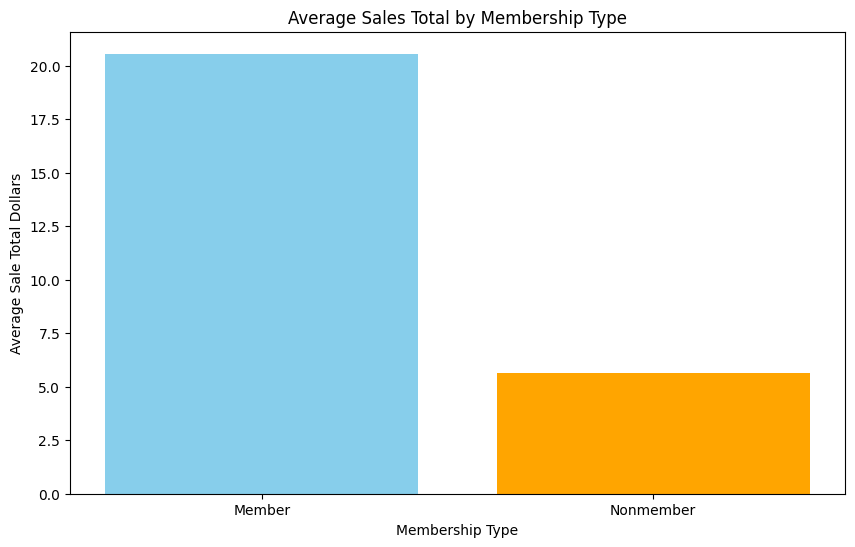

In [30]:
# Trực quan hóa dữ liệu bằng matplotlib
plt.figure(figsize=(10, 6))
plt.bar(merged_mem['Membership'], merged_mem['Average'], color=['skyblue', 'orange'])
plt.xlabel('Membership Type')
plt.ylabel('Average Sale Total Dollars')
plt.title('Average Sales Total by Membership Type')
plt.xticks(rotation=0)
plt.show()